In [2]:
from sys import stdout
from math import sqrt, log
 
def is_prime ( p ):
  if p == 2: return True # Lucas-Lehmer test only works on odd primes
  elif p <= 1 or p % 2 == 0: return False
  else:
    for i in range(3, int(sqrt(p))+1, 2 ): 
      if p % i == 0: return False
    return True

# -------------------------------------------------------------------------------
def is_mersenne_prime ( p ):
  if p == 2:
    return True
  else:
    m_p = ( 1 << p ) - 1
    s = 4
    for i in range(3, p+1): 
      s = (s ** 2 - 2) % m_p
    return s == 0
# -------------------------------------------------------------------------------
def lucas_lehmer_fast(n):
    if n == 2:
        return True
#    elif not isprime(n):
#        return False
    else:
        m = 2**n - 1 # oder (1 << n) - 1
        s = 4
        t0=time.time()
        for i in range(2, n):
            if i & 1023 == 0:
                t1=time.time()-t0
                print (i, t1, n/i*t1) 
            sqr = s*s
            s = (sqr & m) + (sqr >> n)
            if s >= m:
                s -= m
            s -= 2
        return s == 0
# -------------------------------------------------------------------------------
def lucas_lehmer_fast2(n):
    if n == 2:
        return True
#    elif not isprime(n):
#        return False
    else:
        m = 2**n - 1 # oder (1 << n) - 1
        s = 4
        for i in range(2, n):
            sqr = s*s
            s = sqr & m 
            s += sqr >> n
            if s >= m:
                print(i)
                s -= m
            s -= 2
        return s == 0
# -------------------------------------------------------------------------------
precision = 20000   # maximum requested number of decimal places of 2 ** MP-1 #
long_bits_width = precision * log(10, 2)
upb_prime = int( long_bits_width - 1 ) / 2    # no unsigned #
upb_count = 15      # find 45 mprimes if int was given enough bits #
 
print (" Finding Mersenne primes in M[2..%d]:"%upb_prime)
 
count=0
for p in range(2, int(upb_prime+1)): 
  if is_prime(p) and is_mersenne_prime(p):
    print("M%d"%p),
    stdout.flush()
    count += 1
  if count >= upb_count: break
print

 Finding Mersenne primes in M[2..33218]:
M2
M3
M5
M7
M13
M17
M19
M31
M61
M89
M107
M127
M521
M607
M1279


<function print>

In [ ]:
import time
x=11213
t1=time.time()
print(is_mersenne_prime (x))
t2=time.time()
print(lucas_lehmer_fast(x))
t3=time.time()
print(lucas_lehmer_fast2(x))
t4=time.time()
print("{0:6.5f} s".format((t2-t1)))
print("{0:6.5f} s".format((t3-t2)))
print("{0:6.5f} s".format((t4-t3)))

%timeit is_mersenne_prime (x)
%timeit lucas_lehmer_fast (x)
%timeit lucas_lehmer_fast2 (x)

In [ ]:
import time
x=11213; x1=19937
t1=time.time()
print(lucas_lehmer_fast(x))
t2=time.time()
print(lucas_lehmer_fast(x1))
t3=time.time()
print(x, ": {0:6.5f} s".format((t2-t1)))
print(x1, ": {0:6.5f} s".format((t3-t2)))


In [3]:
import time
Zahl=[11213, 19937, 44497]
# Zahl=[86243, 132049, 216091]
#  11213 :        0.700 s      True
#  19937 :        3.216 s      True
#  44497 :       25.989 s      True
#  86243 :      143.599 s      True
# 132049 :      452.959 s      True
# 216091 :     1521.857 s      True

#lx=len(Zahl)
#t1=[0]*lx; t2=[0]*lx
#print(x)
#print(t)


for x in Zahl:
    t1=time.time()
    rc=lucas_lehmer_fast(x)
    t1=time.time()-t1
    print(x, ": {0:12.3f} s     ".format(t1), rc)

1024 0.06405019760131836 0.701362173538655
2048 0.12882637977600098 0.7053370099747553
3072 0.18860316276550293 0.6884138229458282
4096 0.25560712814331055 0.6997369941091165
5120 0.3216090202331543 0.7043363171629607
6144 0.3909323215484619 0.7134642124874517
7168 0.4534785747528076 0.7093827090824821
8192 0.5101947784423828 0.6983415589202195
9216 0.5676426887512207 0.6906442566153904
10240 0.6266791820526123 0.686225944175385
11213 :        0.688 s      True
1024 0.1471853256225586 2.865658043883741
2048 0.30108094215393066 2.930981808458455
3072 0.4570348262786865 2.966114365728572
4096 0.6069445610046387 2.954261160339229
5120 0.7699320316314697 2.9980732255149634
6144 0.9168522357940674 2.9751437215212113
7168 1.0874693393707275 3.024675811807226
8192 1.251166820526123 3.044984484964516
9216 1.4041030406951904 3.0375002519900187
10240 1.5715210437774658 3.059708500956185
11264 1.7437360286712646 3.0863694250371987
12288 1.903935432434082 3.0890918551788977
13312 2.054615020751953

KeyboardInterrupt: 

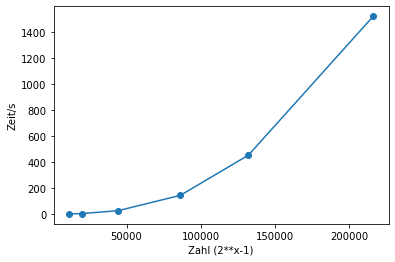

In [6]:
import matplotlib.pyplot as plt
xwerte = [11213, 19937, 44497, 86243, 132049, 216091]
ywerte = [0.700, 3.216, 25.989, 143.599, 452.959, 1521.857]
plt.plot(xwerte, ywerte, marker='o')
plt.xlabel("Zahl (2**x-1)")
plt.ylabel("Zeit/s")
plt.show()
